In [185]:
##Artificial Intelligence
##PIA - Convolutional Newtwork Training.
##Instructor: ENG. Daniel Lopez Isaías.
#Team Members: Meztli Sofia Compean García
##Paula Valeria González Pedraza
##Axel Habib Romo Castillo
##Kelly Marlen Tamez González 
##Debany Alejandra Villareal Martínez
##Class Day and Time: Tuesday N4

In [187]:
##Importing the needed libraries

import tensorflow as tf
import numpy as np 
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D

import pandas as pd 
import os

In [188]:
##Importing and preprocessing the data from the dataset that will be used for training the CNN
train_ds= tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(32,32))

Found 33984 files belonging to 4 classes.
Using 27188 files for training.


In [189]:
##Importing the data from the dataset that will be used for validation in the CNN

val_ds=tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(32,32))

Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [190]:
##Checking the class names from the dataset

class_names = train_ds.class_names
print(class_names)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


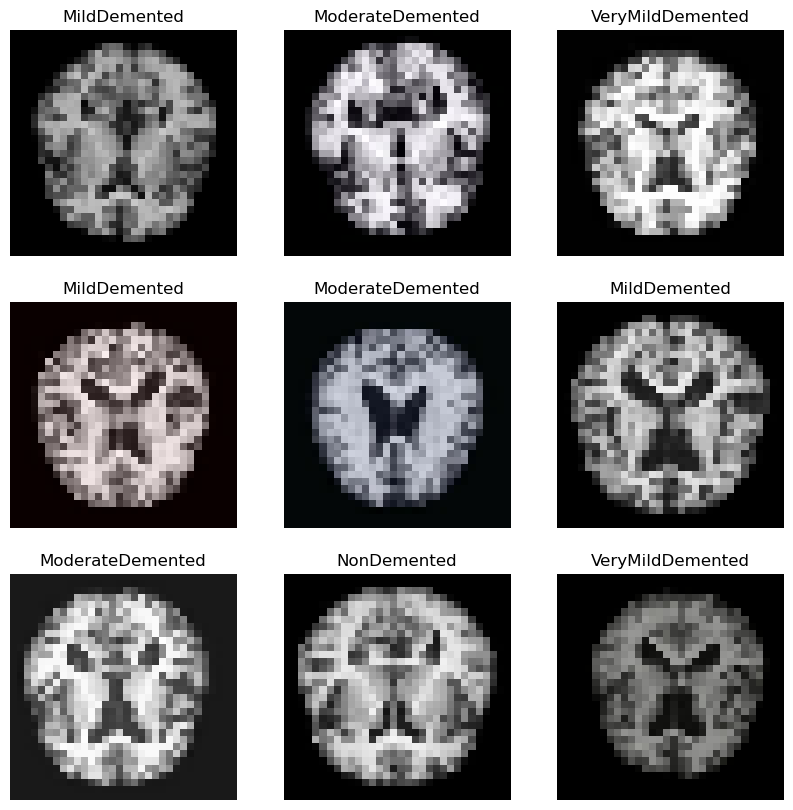

In [191]:
##Verfying that the data is correct

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [192]:
#Creating the convolutional base

model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [193]:
#Dense layers are added to the CNN

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [194]:
#Printing a summary of the model

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [195]:
#Training the CNN

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history= model.fit(train_ds, epochs=7, 
                   validation_data=(val_ds))

Epoch 1/7
850/850 [==============================] - 21s 24ms/step - loss: 1.4918 - accuracy: 0.5201 - val_loss: 0.7398 - val_accuracy: 0.6430
Epoch 2/7
850/850 [==============================] - 20s 24ms/step - loss: 0.7877 - accuracy: 0.6497 - val_loss: 0.7377 - val_accuracy: 0.6484
Epoch 3/7
850/850 [==============================] - 20s 24ms/step - loss: 0.6823 - accuracy: 0.7009 - val_loss: 0.7285 - val_accuracy: 0.6906
Epoch 4/7
850/850 [==============================] - 20s 24ms/step - loss: 0.6218 - accuracy: 0.7284 - val_loss: 0.5065 - val_accuracy: 0.7844
Epoch 5/7
850/850 [==============================] - 20s 24ms/step - loss: 0.5714 - accuracy: 0.7555 - val_loss: 0.6834 - val_accuracy: 0.7180
Epoch 6/7
850/850 [==============================] - 21s 25ms/step - loss: 0.5327 - accuracy: 0.7755 - val_loss: 0.4197 - val_accuracy: 0.8242
Epoch 7/7
850/850 [==============================] - 22s 25ms/step - loss: 0.4889 - accuracy: 0.7958 - val_loss: 0.3726 - val_accuracy: 0.8359

850/850 - 11s - loss: 0.4167 - accuracy: 0.8275 - 11s/epoch - 13ms/step


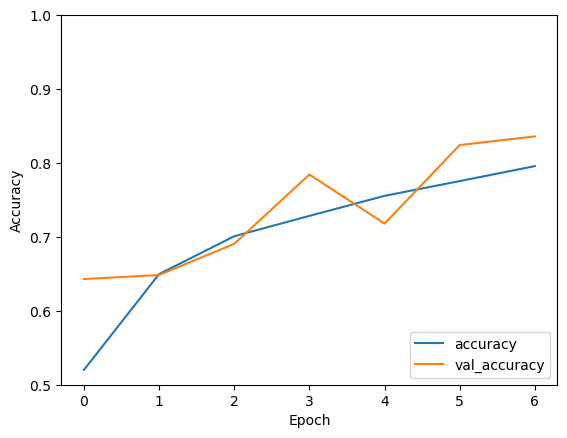

In [196]:
#Model evaluation


plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(train_ds, verbose=2)


In [197]:
#Model accuracy

print(test_acc)

0.8275341987609863


In [198]:
##Making 10 Predictions

predictions = model.predict(val_ds)


40/40 [==============================] - 1s 11ms/step


In [199]:
predictions[0]

array([ -3.6108623, -24.586353 ,   9.317209 ,   5.4624214, -69.57036  ,
       -62.63619  , -68.22419  , -45.521072 , -67.80129  , -48.985817 ],
      dtype=float32)

In [200]:
np.argmax(predictions[0])

2

In [201]:
predictions = model.predict(val_ds)

40/40 [==============================] - 1s 11ms/step


In [202]:
predictions[0]


array([ -0.84858876, -21.531538  ,   8.534604  ,   5.0933247 ,
       -66.76591   , -59.638233  , -61.803623  , -46.952354  ,
       -64.649864  , -45.642967  ], dtype=float32)

In [203]:
np.argmax(predictions[9])

2

In [204]:
predictions = model.predict(val_ds)
predictions[0]
np.argmax(predictions[2])

40/40 [==============================] - 1s 10ms/step


2

In [205]:
predictions = model.predict(val_ds)
predictions[0]
np.argmax(predictions[7])

40/40 [==============================] - 1s 11ms/step


2

In [206]:
predictions = model.predict(val_ds)
predictions[0]
np.argmax(predictions[1])

40/40 [==============================] - 1s 12ms/step


3

In [207]:
predictions = model.predict(val_ds)
predictions[0]
np.argmax(predictions[58])

40/40 [==============================] - 0s 10ms/step


2

In [208]:
predictions = model.predict(val_ds)
predictions[0]
np.argmax(predictions[99])

40/40 [==============================] - 0s 9ms/step


3

In [209]:
predictions = model.predict(val_ds)
predictions[0]
np.argmax(predictions[45])

40/40 [==============================] - 0s 10ms/step


2

In [210]:
predictions = model.predict(val_ds)
predictions[0]
np.argmax(predictions[29])

40/40 [==============================] - 0s 10ms/step


2

In [211]:
predictions = model.predict(val_ds)
predictions[0]
np.argmax(predictions[12])

40/40 [==============================] - 1s 11ms/step


2